# Principal Component Analysis in Python

In [35]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [36]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=random.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=random.randrange(10, 1000), size=5)

print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  372  398  391  372  390  912  906  949  853  924
gene2  760  848  849  825  759  295  284  298  314  297
gene3  902  984  947  931  910  335  369  331  362  337
gene4  465  434  430  517  455  449  418  442  466  415
gene5  308  321  346  309  335  827  849  858  809  800
(100, 10)


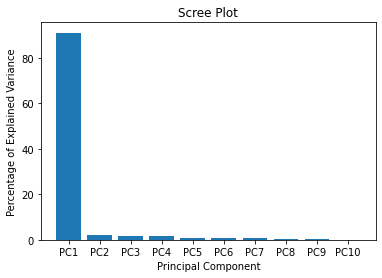

In [37]:
scaled_data = preprocessing.scale(data.T)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

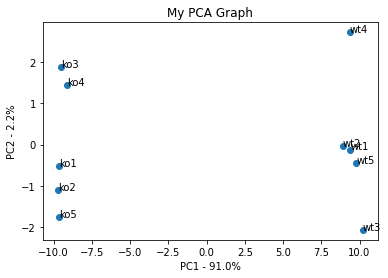

In [38]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [39]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])

gene28   -0.104758
gene55   -0.104735
gene78    0.104723
gene87   -0.104721
gene71   -0.104692
gene94   -0.104690
gene33   -0.104663
gene70   -0.104652
gene18    0.104652
gene61   -0.104647
dtype: float64
